In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [4]:
#Loading the dataset
columns=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',  'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',  'hours-per-week', 'native-country', 'income']
df=pd.read_csv('adult.data',delimiter=',',header=None,names=columns)

In [5]:
#checking the size
df.shape

(32561, 15)

## Structure of the Dataset

In [6]:
#First few rows of the dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
#Statistical summary of the dataset
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Data Cleaning

**Checking the null values.**

In [9]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [10]:
columns_list=df.columns.to_list()

**Checking the value counts to see the unique values and there counts.**

In [11]:

for col in columns_list:
    print(f'value_counts of {col}')
    print(df[col].value_counts())
    print('-------------------------------------')#seperation

value_counts of age
age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64
-------------------------------------
value_counts of workclass
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
-------------------------------------
value_counts of fnlwgt
fnlwgt
123011    13
164190    13
203488    13
121124    12
126675    12
          ..
316185     1
292353     1
205019     1
180296     1
422249     1
Name: count, Length: 21648, dtype: int64
-------------------------------------
value_counts of education
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th          

**From the above code output we can see that the columns 'workclass', 'occupation' and 'native-country' have the '?' which represents the missing values.**

## Dealing With the Missing Values

**Filling the missing values with most repeated value of it's  respective column. As all of the missing values columns are categorical(non numeric), I am using mode imputation to replace the missing values.**

In [12]:

miss_cols=['workclass','occupation','native-country']
for col in miss_cols:
    df[col]=df[col].str.strip()
    most_repeated_value=df[col].mode()[0]
    print(f'most repeated value of {col} is {most_repeated_value}')
    df.loc[df[col]=='?',col]=most_repeated_value

most repeated value of workclass is Private
most repeated value of occupation is Prof-specialty
most repeated value of native-country is United-States


In [13]:
#checking if they are replaced correctly
for col in miss_cols:
    print(f'value_counts of {col}')
    print(df[col].value_counts())
    print('-------------------------------------')#seperation

value_counts of workclass
workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
-------------------------------------
value_counts of occupation
occupation
Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64
-------------------------------------
value_counts of native-country
native-country
United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121


# Dealing with duplicates

In [14]:
#checking the duplicates
df.duplicated().sum()

np.int64(24)

In [15]:
#removing the duplicates
df=df.drop_duplicates()

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
#taking a copy of df before encoding to use it in EDA, so that the plots can be shown clearly.
df_EDA=df.copy()

## ENCODING

'Education' column is already encoded and present in dataset as 'education-num'. Therfore I am dropping the education column.

In [18]:
df.drop(columns=['education'],inplace=True)

In [19]:
df.head() #checking if education column is dropped

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Label Encoding

**Applying Label Encoding to columns sex and income.**

In [20]:
#sex column encoding
df['sex']=df['sex'].str.strip()
sex_mapping={'Male':1,'Female':0}#creating a mapping
df['sex']=df['sex'].map(sex_mapping)

In [21]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,<=50K


In [22]:
#income column encoding
df['income']=df['income'].str.strip()
income_mapping={'<=50K':0,'>50K':1}
df['income']=df['income'].map(income_mapping)

In [23]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


## Nominal Encoding

**Applying Nominal encoding to all other categorical columns using get dummies.**

In [24]:
cat_col=df.select_dtypes(include=['object']).columns #selecting categorical columns
print(cat_col)
df_encoded= pd.get_dummies(df, columns=cat_col,drop_first=True)

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'native-country'],
      dtype='object')


In [25]:
df_encoded.head()#checking if the encoding has been done

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,1,2174,0,40,0,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,1,0,0,13,0,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,1,0,0,40,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,1,0,0,40,0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,0,40,0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,

In [26]:
df_encoded.shape

(32537, 83)

## EDA

## Distribution of the Population by Age Group

In [27]:
#checking the min and max of age to create the bins
min_age=df_EDA['age'].min()
max_age=df_EDA['age'].max()
print(f'min of age is:{min_age}, max of age is {max_age}')

min of age is:17, max of age is 90


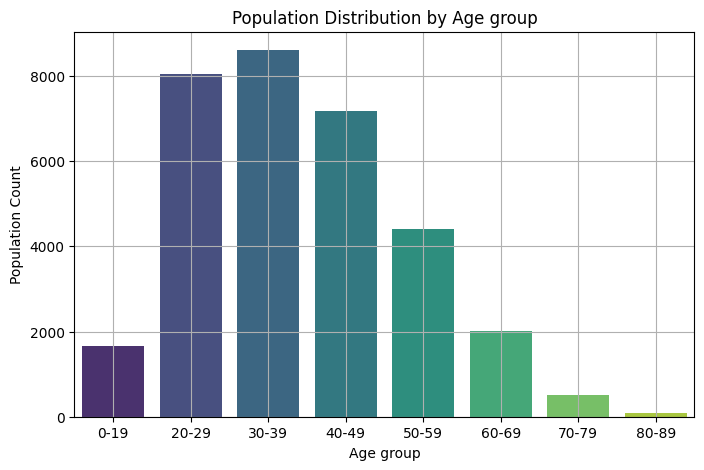

In [28]:
# Creating bins for age column
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

age_group= pd.cut(df_EDA['age'], bins=age_bins, labels=age_labels, right=False)

# Plotting the distribution of the population by age group
plt.figure(figsize=(8, 5))
sns.countplot(x=age_group, palette='viridis')
plt.title('Population Distribution by Age group')
plt.xlabel('Age group')
plt.ylabel('Population Count')
plt.grid(True)
plt.show()


## Analysis: Age Distribution 

From the **bar plot**, it is evident that the majority of the population falls into the **20-29** and **30-39** age groups. This suggests a focus on **young and middle-aged adults**, which aligns with the dataset's focus on **employment and income**:

- The **younger** age groups (20-39) are well-represented, as these are typically the **working-age** population.
- The number of people in **older age groups** (especially **60-69** and above) is significantly smaller, likely reflecting fewer **retirees** or individuals who are **no longer working**.

Overall, the dataset primarily represents **working-age adults**, which may influence the analysis of factors like **income** and **education**.


## Distribution of Income by Gender

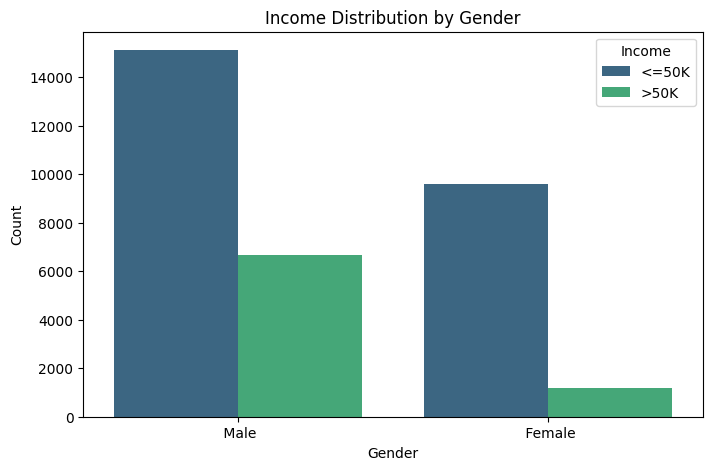

In [29]:
# Plotting the distribution of income by gender
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', hue='income', data=df_EDA, palette='viridis')
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Income', loc='upper right', labels=['<=50K', '>50K'])
plt.show()


## Analysis: Income Distribution by Gender

The **income distribution plot** by **gender** reveals a noticeable disparity between **males** and **females**:

- A larger proportion of **males** earn **more than 50K** compared to **females**.
- A significant number of **females** are in the **<=50K** income group.

This suggests a **gender gap** in income levels, where **males** are more likely to earn **higher salaries** than **females**. The plot highlights a common trend observed in many real-world datasets where **income inequality** between genders exists, possibly due to factors such as **job roles, opportunities,** and **systemic disparities** in the workplace.


## Distribution of Hours Worked Per Week Based on Income

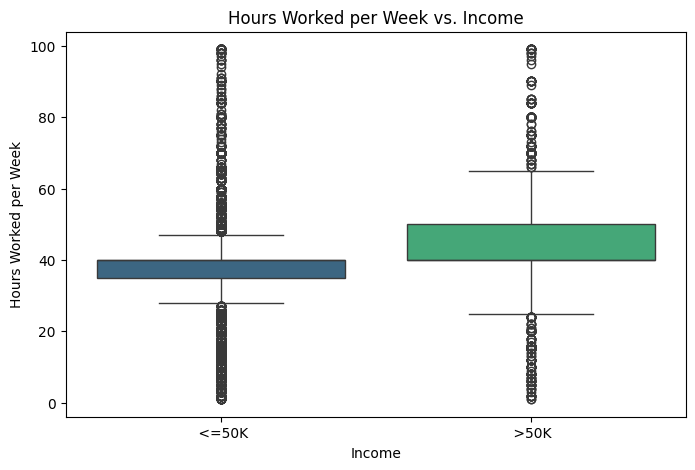

In [30]:
# Plotting the distribution of hours worked per week based on income
plt.figure(figsize=(8, 5))
sns.boxplot(x='income', y='hours-per-week', data=df_EDA, palette='viridis')
plt.title('Hours Worked per Week vs. Income')
plt.xlabel('Income')
plt.ylabel('Hours Worked per Week')
plt.show()


## Analysis: Hours Worked per Week vs. Income

The **box plot** comparing **hours worked per week** for individuals earning **<=50K** and those earning **>50K** reveals notable trends:

- Individuals earning **>50K** tend to work **more hours per week** compared to those earning **<=50K**.
- The **median** for the **higher income group** is above **40 hours per week**, while the **lower income group** centers around **40 hours**.
- There's **more variation** in hours worked for the **higher income group**, with a number of **outliers** working significantly more hours.

This suggests that **working more hours** might be associated with earning a **higher income**, although other factors may also contribute to this outcome.


## Income Distribution by Education Level (Stacked Bar Plot)

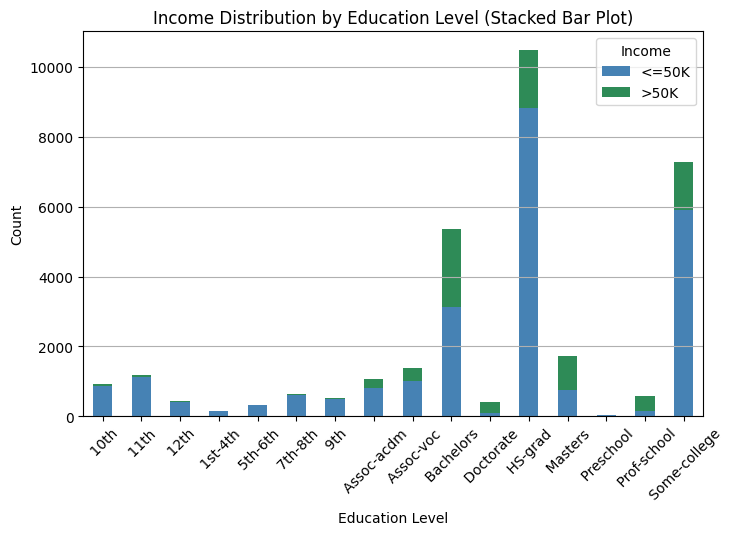

In [31]:
# Creating a pivot table for the counts of income by education level
income_counts = df_EDA.groupby(['education', 'income']).size().unstack()

# Plotting the stacked bar plot
income_counts.plot(kind='bar', stacked=True, figsize=(8, 5), color=['#4682B4', '#2E8B57'])
plt.title('Income Distribution by Education Level (Stacked Bar Plot)')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability)
plt.legend(title='Income', loc='upper right', labels=['<=50K', '>50K'])
plt.grid(axis='y')
plt.show()


## Analysis: Income Distribution by Education Level

The **bar chart** highlights how income varies based on education level. Key insights from the chart include:

- Individuals with **higher education**, such as **bachelor's**, **master's**, or **doctorate** degrees, are more likely to earn **>50K**, indicated by the larger green sections.
- The **largest group** of people consists of **high school graduates**, though the majority of them earn **<=50K**.
- Those with **professional** or **post-college education** also show a significant number of individuals earning **>50K**.
  
This analysis suggests a clear link between **higher education** and **better income prospects**, as individuals with advanced degrees tend to have higher earnings.


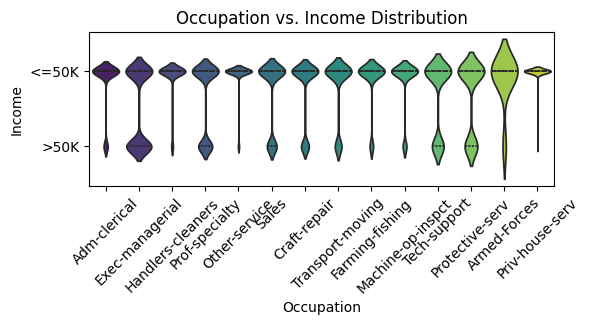

In [60]:
plt.figure(figsize=(6, 2))
sns.violinplot(x='occupation', y='income', data=df_EDA, palette='viridis', inner='quartile')
plt.title('Occupation vs. Income Distribution')
plt.xlabel('Occupation')
plt.ylabel('Income')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.yticks([0, 1], ['<=50K', '>50K'])  # Adjusting y-ticks for clarity
plt.show()

## Analysis: Income Distribution Across Occupations

The **violin plot** illustrates how income varies across different occupations. The width of each violin represents the density of people within each income level for that particular occupation. Here's a summary of the key insights:

- For most occupations, the majority of individuals earn **<=50K**, as indicated by the larger width in the lower part of each violin.
- Occupations such as **executive managerial roles** and **professional specialties** display a higher proportion of individuals earning **>50K**, reflecting these roles' higher-paying nature.
- Conversely, occupations like **handlers-cleaners**, **private house service**, and **farming-fishing** have very few individuals earning above 50K, suggesting that these roles tend to offer lower wages.

This analysis provides a visual understanding of income distribution across different job sectors, highlighting the disparities in earnings between various occupations.


# Cleaning and Applying Encoding to the Test Data As Done for the Training Data

In [33]:
#Loading the test dataset
columns=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',  'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',  'hours-per-week', 'native-country', 'income']
df_test=pd.read_csv('adult.test',delimiter=',',header=None,names=columns,skiprows=1)
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [34]:
#dealing with  test dataset missing values
miss_cols=['workclass','occupation','native-country']
for col in miss_cols:
    df_test[col]=df_test[col].str.strip()
    most_repeated_value=df_test[col].mode()[0]
    print(f'most repeated value of {col} is {most_repeated_value}')
    df_test.loc[df_test[col]=='?',col]=most_repeated_value

most repeated value of workclass is Private
most repeated value of occupation is Prof-specialty
most repeated value of native-country is United-States


In [35]:
#removing the test dataset duplicates
df_test.duplicated().sum()

np.int64(5)

In [36]:
df_test.drop_duplicates(inplace=True)
df_test.duplicated().sum()

np.int64(0)

In [37]:
#Applying Encoding to the test dataset
df_test['sex']=df_test['sex'].str.strip()
sex_mapping={'Male':1,'Female':0}
df_test['sex']=df_test['sex'].map(sex_mapping)
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688,0,40,United-States,>50K.
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,0,0,0,30,United-States,<=50K.


In [38]:
df_test['income']=df_test['income'].str.strip()
income_mapping={'<=50K.':0,'>50K.':1}
df_test['income']=df_test['income'].map(income_mapping)

In [39]:
cat_col=df.select_dtypes(include=['object']).columns #selecting categorical columns
df_test_encoded= pd.get_dummies(df_test, columns=cat_col,drop_first=True)
df_test_encoded = df_test_encoded.reindex(columns=df_encoded.columns, fill_value=0)

In [40]:
#df_test_encoded.drop(columns=['education'],inplace=True)
df_test_encoded.shape

(16276, 83)

In [41]:
#Checking the data 
df_test_encoded.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,1,0,0,50,0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,1,0,0,40,1,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,1,7688,0,40,1,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,0,0,0,30,0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True

## Predictive Modeling

## Income Classification Model Using Random Forest Classifier

In this step, I built a model to predict whether a person earns more than $50,000 or less using a **Random Forest Classifier**. The process was as follows:

1. **Splitting the Data**:  
   The dataset was divided into features (inputs) and the target variable, which was the income column. This split was applied for both the training and testing datasets.

2. **Feature Scaling**:  
   Feature scaling was performed using `StandardScaler` to ensure that all features were on the same scale. This step improves the model's performance by making the learning process more efficient.

3. **Training the Model**:
   - A `RandomForestClassifier` was initialized with the following parameters:
     - `n_estimators=100`: This sets the number of decision trees in the forest to 100.
     - `random_state=42`: This ensures consistent results across different runs.
   - The classifier was trained on the scaled training data, allowing it to learn the relationships between the features and the target income levels.

4. **Making Predictions**:  
   After the training phase, predictions were made on the test dataset. The model's ability to classify individuals based on their income levels was then evaluated.

The Random Forest Classifier model helps in accurately classifying whether an individual earns more or less than $50,000 based on various input features.


In [42]:
# Defining features and target variable for test data
X_test = df_test_encoded.drop('income', axis=1)  # Features
y_test = df_test_encoded['income']  # Target variable 


In [43]:
# Defining features and target variable for training data
X_train = df_encoded.drop('income', axis=1)  # Features
y_train = df_encoded['income']  # Target variable

In [44]:
# Scaling the features 
# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler on the training data 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Initializing the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the classifier to the training data
rf_classifier.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [46]:
#predicting the test data
y_rf_pred = rf_classifier.predict(X_test_scaled)

## Evaluating the model

In [53]:
#checking accuracy
accuracy = accuracy_score(y_test, y_rf_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 85.47%


In [54]:
#checking precision,recall and f1-score
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     12430
           1       0.73      0.61      0.66      3846

    accuracy                           0.85     16276
   macro avg       0.81      0.77      0.79     16276
weighted avg       0.85      0.85      0.85     16276



In [55]:
#checking confusion matrix
print(confusion_matrix(y_test, y_rf_pred))

[[11577   853]
 [ 1512  2334]]


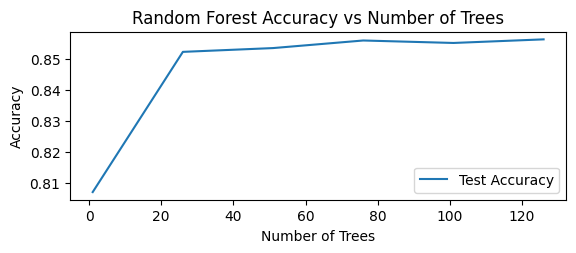

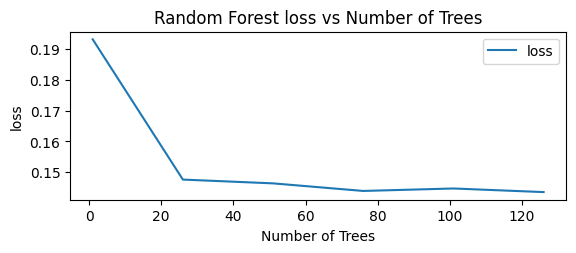

In [56]:
#Accuracy plot

test_accuracies = []
index=[]
loss=[]
# Loop through the range of number of trees
for i in range(1, 150,25):  # Train the model incrementally by adding trees
    rf_classifier.set_params(n_estimators=i)
    rf_classifier.fit(X_train_scaled, y_train)

    test_pred = rf_classifier.predict(X_test_scaled)

    
    test_acc = accuracy_score(y_test, test_pred)
    loss.append(1-test_acc)

    test_accuracies.append(test_acc)
    index.append(i)

# Plot the accuracy vs number of trees
#plt.plot(range(1, 101), train_accuracies, label="Train Accuracy")
plt.subplot(2,1,1)
plt.plot(index, test_accuracies, label="Test Accuracy")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs Number of Trees")
plt.legend()
plt.show()
#loss plot
plt.subplot(2,1,2)
plt.plot(index, loss, label="loss")
plt.xlabel("Number of Trees")
plt.ylabel("loss")
plt.title("Random Forest loss vs Number of Trees")
plt.legend()
plt.show()

The Random Forest model was evaluated using various metrics to understand its performance in predicting income levels. The accuracy of the model was found to be **85.47%**, indicating that the model correctly classified about 85.47% of the test samples. 

The confusion matrix revealed that the model made **11,673** correct predictions for individuals earning less than or equal to 50k and **2,517** correct predictions for those earning more than 50K, while it also made some incorrect classifications, with **757** samples misclassified as less than 50K and **1,329** samples misclassified as more than 50K.

The classification report provided more insight into the model's performance:

- For individuals earning **less than or equal to $50K** (label 0):
  - **Precision**: 0.88, meaning 88% of the predictions for this class were correct.
  - **Recall**: 0.93, indicating that the model correctly identified 93% of the individuals in this class.
  - **F1-score**: 0.91, representing a good balance between precision and recall.

- For individuals earning **more than $50K** (label 1):
  - **Precision**: 0.73
  - **Recall**: 0.61
  - **F1-score**: 0.66

The model had more difficulty accurately classifying the higher income levels.

Additionally, the accuracy of the model was analyzed as the number of trees in the Random Forest changed. The **accuracy plot** showed the relationship between the number of trees and model performance, with accuracy generally increasing as more trees were added, but with some variation. A **loss plot** was also created, indicating how the error decreased with an increase in the number of trees, showing the model’s improvement in performance as it trained with more trees. Overall, the model showed a good level of accuracy, although it struggled somewhat with predicting the higher income group.


In [ ]:
#just to check how the XGboost is working 
import xgboost as xgb
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initializing the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fitting the classifier to the training data
xgb_classifier.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_xgb_pred = xgb_classifier.predict(X_test_scaled)

In [283]:
#checking accuracy
accuracy = accuracy_score(y_test, y_xgb_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 87.18%
